## Instructions

You work at a local jewelry store named *Dazzling Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

The store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help the owner. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is the owner. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to the owner.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help the owner understand his customers better*. Please!




## 1.0: Load data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
df = pd.read_csv(r"Jewlery_Customers.csv")

In [3]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [25]:
#Checking null values
df.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

## 1.1: Clustering Algorithm #1  KMeans

In [4]:
#Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
#Applying kmeans algorithm, checking number of clusters and storing the Silhouette Score, Calinski-Harabasz Score into a dataframe.
kmeans_scores_df =[]
for n_clusters in range(2, 11):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)  
    kmeans_scores_df.append((n_clusters, silhouette_avg, calinski_harabasz))


kmeans_scores_df = pd.DataFrame(kmeans_scores_df, columns=["Number of Clusters", "Silhouette Score", "Calinski-Harabasz Score"])


kmeans_scores_df


C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,Number of Clusters,Silhouette Score,Calinski-Harabasz Score
0,2,0.521259,490.808135
1,3,0.696348,1066.581241
2,4,0.758119,1611.264737
3,5,0.804898,3671.358019
4,6,0.632357,3197.113764
5,7,0.445455,2860.624734
6,8,0.297177,2640.855798
7,9,0.293771,2414.577364
8,10,0.290358,2267.420684


The Silhouette Score peaks at 5 clusters (0.8049), suggesting this is where the clusters are most well-defined.

The Calinski-Harabasz Score also shows a significant jump at 5 clusters (3671.36), indicating the clusters are well-separated at this point.

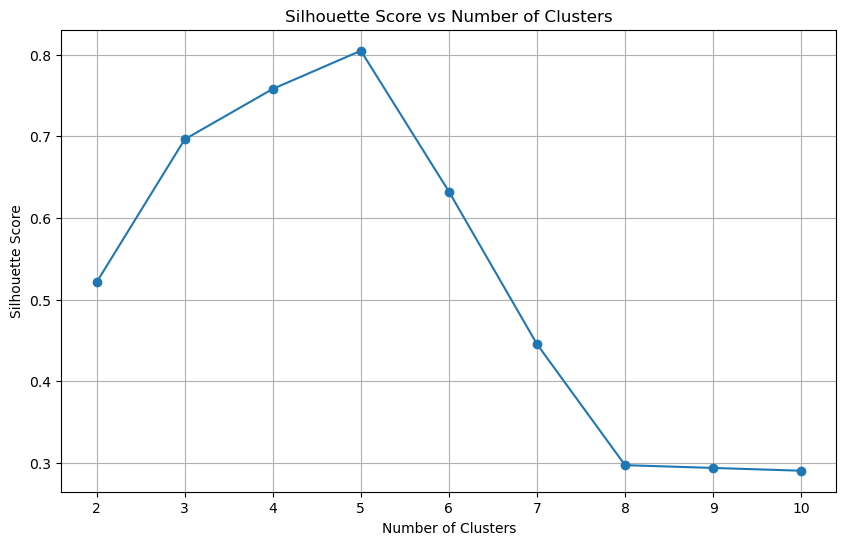

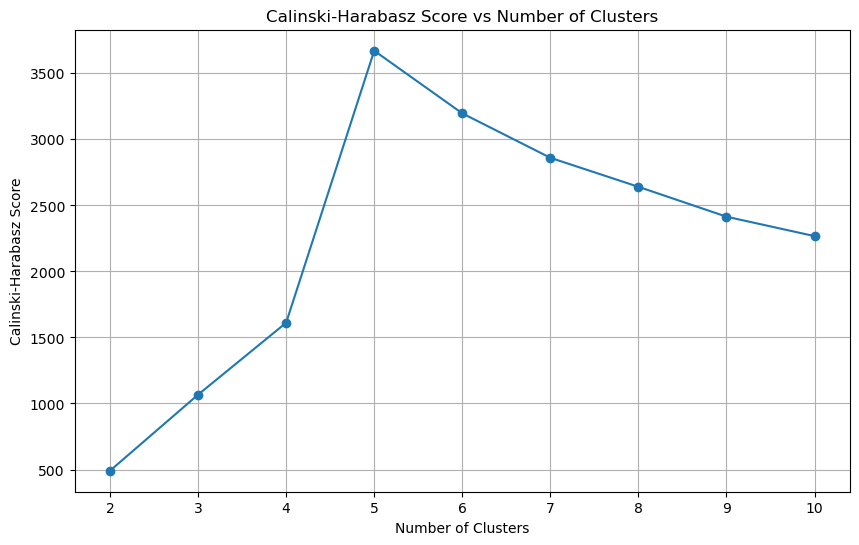

In [29]:
#Plotting line graph to visually see the optimal cluster with Silhouette Score, and Calinski-Harabasz Score.
scores = ["Silhouette Score", "Calinski-Harabasz Score"]
for j in scores:
   plt.figure(figsize=(10, 6))
   plt.plot(kmeans_scores_df["Number of Clusters"], kmeans_scores_df[j], marker='o')
   plt.title(f"{j} vs Number of Clusters")
   plt.xlabel("Number of Clusters")
   plt.ylabel(j)
   plt.grid(True)
   plt.show()

In [32]:
#K-means clustering to segment the scaled_data into 5 distinct clusters.
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\risha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


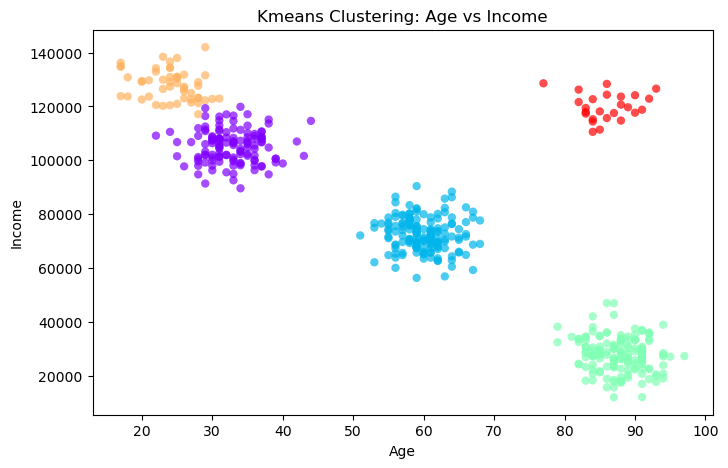

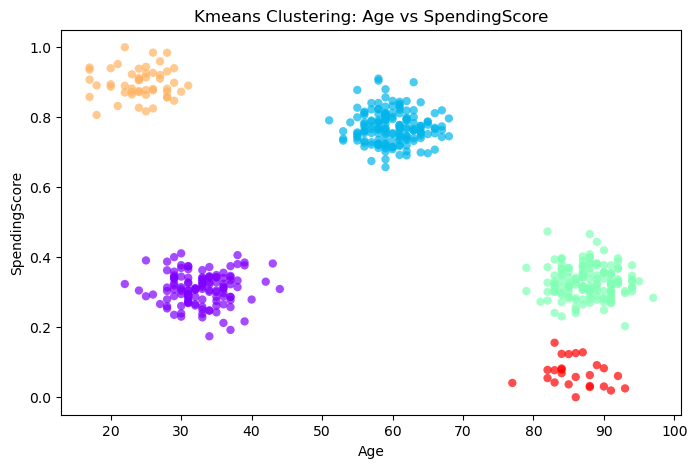

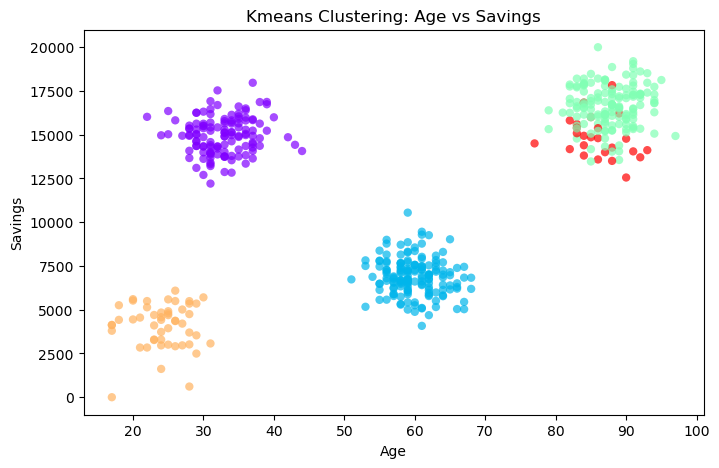

In [33]:
#scatter plots to visualize how Age relates to each other column in df, colored by K-means cluster labels, 
#helping identify patterns across different features for each age group.

for col in df.columns:
    if col != 'Age':  
        plt.figure(figsize=(8, 5))
        plt.scatter(df['Age'], df[col], c=cluster_labels, cmap='rainbow', alpha=0.7, edgecolors='none')
        plt.title(f"Kmeans Clustering: Age vs {col}")
        plt.xlabel("Age")
        plt.ylabel(col)
        plt.show()

## 1.2: Clustering Algorithm #2  Agglomerative Clustering

In [6]:
#Applying Agglomerative Clustering algorithm, checking number of clusters and storing the Silhouette Score, Calinski-Harabasz Score into a dataframe.
agglomerative_scores = []

for n_clusters in range(2, 11):  
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(scaled_data)
    
    
    silhouette_avg = silhouette_score(scaled_data, labels)
    calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
    
    
    agglomerative_scores.append((n_clusters, silhouette_avg, calinski_harabasz))


agglomerative_scores_df = pd.DataFrame(agglomerative_scores, columns=["Number of Clusters", "Silhouette Score", "Calinski-Harabasz Score"])


agglomerative_scores_df


,Number of Clusters,Silhouette Score,Calinski-Harabasz Score
0,2,0.514761,475.835829
1,3,0.696348,1066.581241
2,4,0.758119,1611.264737
3,5,0.804898,3671.358019
4,6,0.627745,3175.396680
5,7,0.425870,2795.272489
6,8,0.271081,2535.235395
7,9,0.272530,2333.504300
8,10,0.266266,2169.958896


The Silhouette Score peaks at 5 clusters (0.8049), indicating well-defined clusters.

The Calinski-Harabasz Score is also highest at 5 clusters (3671.36), showing optimal separation.

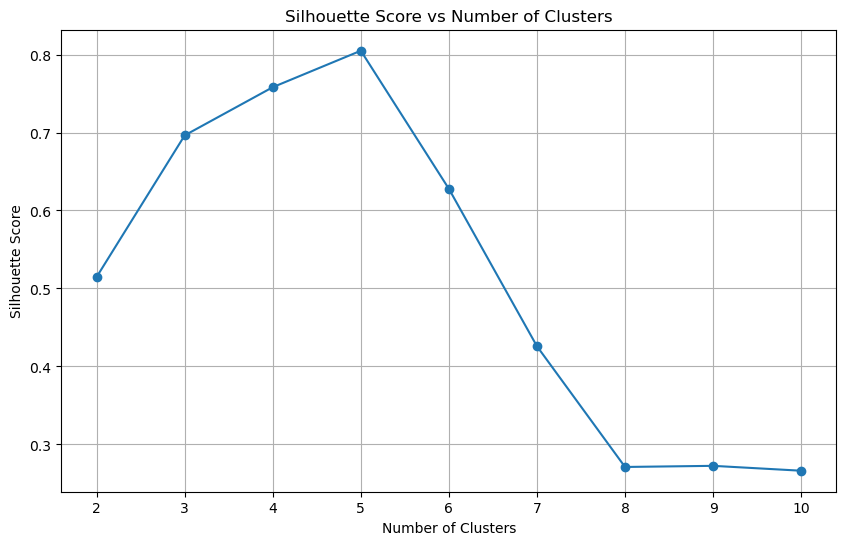

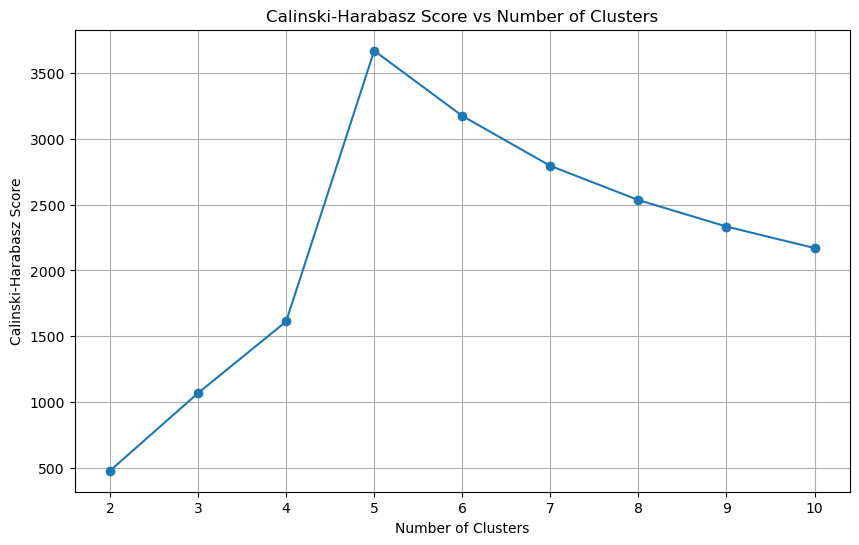

In [7]:
#Plotting line graph to visually see the optimal cluster with Silhouette Score, and Calinski-Harabasz Score.
scores = ["Silhouette Score", "Calinski-Harabasz Score"]
for i in scores:
   plt.figure(figsize=(10, 6))
   plt.plot(agglomerative_scores_df["Number of Clusters"], agglomerative_scores_df[i], marker='o')
   plt.title(f"{i} vs Number of Clusters")
   plt.xlabel("Number of Clusters")
   plt.ylabel(i)
   plt.grid(True)
   plt.show()

In [8]:
#The code applies Agglomerative Clustering to scaled_data, 
#grouping it into 5 clusters using Euclidean distance and Ward's linkage method.
agglomerative = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster_labels = agglomerative.fit_predict(scaled_data)

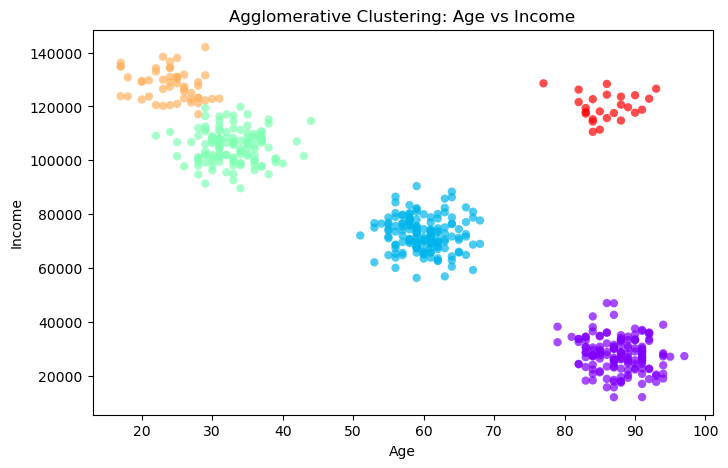

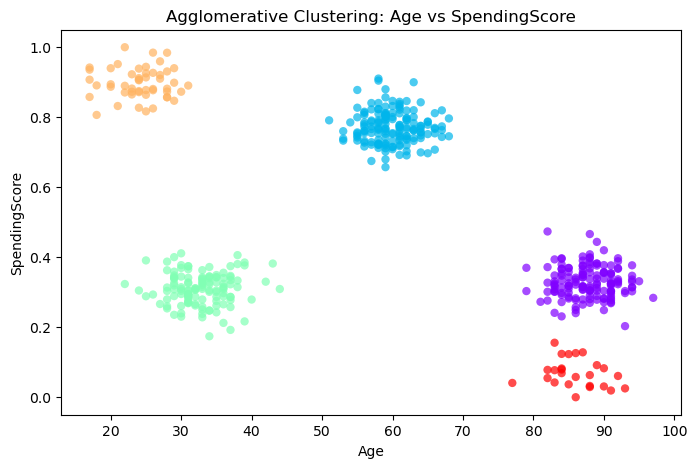

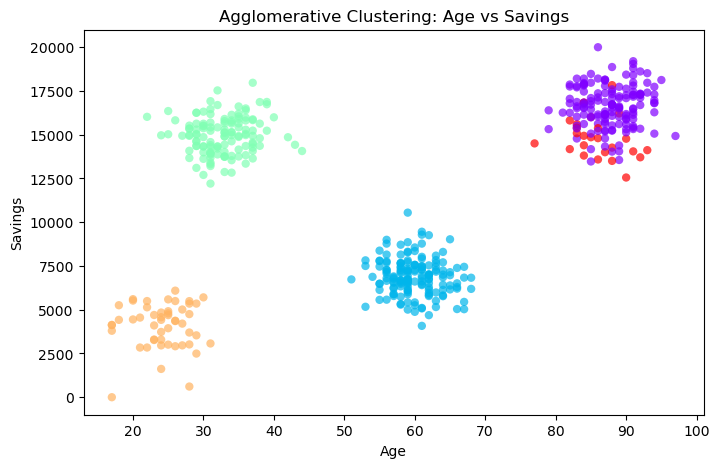

In [9]:
##scatter plots to visualize how Age relates to each other column in df, colored by Agglomerative cluster labels, 
#helping identify patterns across different features for each age group.
for col in df.columns:
    if col != 'Age': 
        plt.figure(figsize=(8, 5))
        plt.scatter(df['Age'], df[col], c=cluster_labels, cmap='rainbow', alpha=0.7, edgecolors='none')
        plt.title(f"Agglomerative Clustering: Age vs {col}")
        plt.xlabel("Age")
        plt.ylabel(col)
        plt.show()

# 1.3 Model Comparison

## Analysis of Clustering Algorithms

## Quality of Results
Both algorithms performed well, with the highest metrics at **5 clusters**. However, **K-Means** generally has an advantage in terms of consistency across different cluster counts.

## 2. Ease of Use
- **K-Means** is easier to implement and tune. 
- It requires fewer parameters to set (mainly the number of clusters) and is straightforward in terms of initialization and execution.

## 3. Speed
- **K-Means** is typically faster, especially with larger datasets, since it uses a simple iterative approach to converge to the optimal clusters. 
- **Agglomerative clustering**, which is hierarchical, has a time complexity that grows quadratically with the number of samples, making it less efficient for larger datasets.

## 4. Interpretability
- **K-Means** offers clearer interpretability of clusters, as it provides centroid values that can be easily analyzed and understood. 
- Each cluster can be summarized by its mean values across features, making it simpler to communicate findings to stakeholders.

# Cluster Analysis

## Cluster 2
- **K-Means** shows slightly better performance in both metrics compared to **Agglomerative**.

## Cluster 3
- Both algorithms have **identical scores**, indicating consistent clustering quality.

## Cluster 4
- Both algorithms also yield **identical scores**, demonstrating a strong clustering structure.

## Cluster 5
- The best-performing configuration with **identical scores** for both methods, indicating optimal clustering.

## Clusters 6-10
- **K-Means** consistently outperforms **Agglomerative** in both metrics, especially in **Silhouette Scores**.

## Conclusion
Overall, **K-Means** demonstrates better clustering quality than **Agglomerative clustering** for most cluster counts, particularly as the number of clusters increases. Both methods agree on the optimal number of clusters (**5**), but **K-Means** provides more consistent performance across the range of clusters evaluated. This makes **K-Means** a more effective choice for your dataset.
 an intuitive way to group and describe customer segments.


## 1.4 Personas

In [38]:
#I chose kmeans as winning model, so using kmeans for clustering.
data = df.copy()  

for label in set(kmeans.labels_):
    print(f'\nCluster {label}:')
    X_tmp = data[kmeans.labels_ == label].copy()
    X_tmp.loc['min'] = X_tmp.min()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.loc['max'] = X_tmp.max()
    X_tmp.loc['Variance'] = X_tmp.var()
    X_tmp.loc['Skewness'] = X_tmp.skew()
    X_tmp.loc['Kurtosis'] = X_tmp.kurtosis()
    
    # Transpose the tail to get the last 6 rows (which are the summary statistics) in a readable format
    print(X_tmp.tail(6).transpose())


Cluster 0:
                        min           mean            max      Variance  \
Age               22.000000      32.692913      44.000000  1.593658e+01   
Income         89598.000000  105142.440945  119877.000000  3.969310e+07   
SpendingScore      0.174120       0.308857       0.411112  2.246879e-03   
Savings        12207.526078   14941.083168   17968.553929  1.230750e+06   

                Skewness    Kurtosis  
Age            -0.273316   12.636501  
Income         11.401698  130.997230  
SpendingScore  -1.481538  103.892419  
Savings        11.399889  130.930706  

Cluster 1:
                        min          mean           max      Variance  \
Age               51.000000     59.898734     68.000000  1.209811e+01   
Income         56321.000000  72345.993671  90422.000000  4.187363e+07   
SpendingScore      0.657314      0.770796      0.910417  2.284674e-03   
Savings         4077.658657   6872.172737  10547.775368  1.220259e+06   

                Skewness    Kurtosis  


# Customer Segmentation Analysis

## Cluster 0: Young Urban Professionals

### Persona: 
Meet Emily, a 32-year-old marketing professional in Toronto. Emily earns around $105,142 a year and loves to shop for trendy jewelry that matches her vibrant lifestyle.

### Statistics:

- Age Range: 22 to 44 years (Mean: 32.69)

- Income Range: $89,598 to $119,877 (Mean: $105,142.44)

- Spending Score: Moderate (Mean: 0.31)

- Savings: $12,207 to $17,968 (Mean: $14,941.08)

### Behavior:
Emily is price-sensitive but values quality. She enjoys sharing her latest jewelry purchases on social media, influencing her peers to shop at Dazzling Diamonds.

---

## Cluster 1: Affluent Middle-Aged Buyers

### Persona: 
Meet David, a 60-year-old senior executive from Vancouver. With an income of $72,346, David appreciates high-quality, luxury items.

### Statistics:

- Age Range: 51 to 68 years (Mean: 59.90)

- Income Range: $56,321 to $90,422 (Mean: $72,345.99)

- Spending Score: High (Mean: 0.77)

- Savings: $4,077 to $10,547 (Mean: $6,872.17)

### Behavior:
David is a loyal customer who responds well to exclusive offers and loyalty programs, often investing in premium pieces for special occasions.

---

## Cluster 2: Budget-Conscious Seniors

### Persona: 
Meet Margaret, an 87-year-old retired teacher from Calgary. With an annual income of $27,758, Margaret focuses on affordability.

### Statistics:

- Age Range: 79 to 97 years (Mean: 87.72)

- Income Range: $12,000 to $46,977 (Mean: $27,758.90)

- Spending Score: Low (Mean: 0.33)

- Savings: $13,470 to $20,000 (Mean: $16,637.72)

### Behavior:
Margaret looks for discounts and is highly influenced by sales. She prefers buying functional yet stylish jewelry that fits her budget.

---

## Cluster 3: Young Affluent Trendsetters

### Persona: 
Meet Liam, a 24-year-old entrepreneur from Montreal. With an income of $127,814, Liam enjoys the freedom to experiment with high-end jewelry styles.

### Statistics:

- Age Range: 17 to 31 years (Mean: 24.04)

- Income Range: $117,108 to $142,000 (Mean: $127,814.98)

- Spending Score: Very high (Mean: 0.90)

- Savings: $0 to $6,089 (Mean: $4,007.37)

### Behavior:
Liam is quick to adopt new trends and shares his jewelry finds on social media, influencing others. He is attracted to limited-edition pieces and brand collaborations.

---

## Cluster 4: Wealthy Older Buyers

### Persona: 
Meet Helen, an 85-year-old retired banker from Ottawa. With an income of $119,584, Helen prefers to invest in timeless jewelry pieces.

### Statistics:

- Age Range: 77 to 93 years (Mean: 85.65)

- Income Range: $110,582 to $128,596 (Mean: $119,583.96)

- Spending Score: Very low (Mean: 0.07)

- Savings: $12,554 to $17,833 (Mean: $14,721.99)

### Behavior:
Helen values quality and bra ather than following trends.
g for classic designs that last a lifetime rather than following trends.
